# Project: Neural Network with one hot encoder
$
\newcommand{\xv}{\mathbf{x}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\bv}{\mathbf{b}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Chi}{\mathcal{X}}
\newcommand{\R}{\rm I\!R}
\newcommand{\sign}{\text{sign}}
\newcommand{\Ym}{\mathbf{Y}}
\newcommand{\Tm}{\mathbf{T}}
\newcommand{\Xm}{\mathbf{X}}
\newcommand{\Wm}{\mathbf{W}}
\newcommand{\Zm}{\mathbf{Z}}
\newcommand{\Um}{\mathbf{U}}
\newcommand{\Vm}{\mathbf{V}}
\newcommand{\Am}{\mathbf{A}}
\newcommand{\muv}{\boldsymbol\mu}
\newcommand{\Sigmav}{\boldsymbol\Sigma}
\newcommand{\Lambdav}{\boldsymbol\Lambda}
$

## Name: <span style="color:blue"> Myles Green </span>

In [78]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introduction and Import

## Diamond Sales Price Dataset
<center><img src="https://t3.ftcdn.net/jpg/00/50/72/28/360_F_50722853_gvXodAjPwTGQwd7BzN2EogZYsWwJ9pwf.jpg" width=600 height=200></center>


This dataset is proudy titled "the largest diamond datatset currently on Kaggle" and I do believe that to be a fact. With just under 220,000 data entries on unqiue diamonds, this dataset can be a valuable asset to those who would like a rough estimate of the sales value of precious stones. We will be creating a regression model to do just that. The dataset has an impressive mix of 24 numeric and non-numeric features, but we will be dropping some and One-hot encoding others. 

Variable Information:
    cut,
    color,
    clarity,
    carat_weight,
    cut_quality,
    lab,
    symmetry,
    polish,
    eye_clean,
    culet_size,
    culet_condition,
    depth_percent,
    table_percent,
    meas_length,
    meas_width,
    meas_depth,
    girdle_min,
    girdle_max,
    fluor_color,
    fluor_intensity,
    fancy_color_dominant_color,
    fancy_color_secondary_color,
    fancy_color_overtone,
    and fancy_color_intensity.

In [79]:
diamond_df = pd.read_csv('diamonds.csv')
diamond_df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [80]:

diamond_df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [81]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

# Exploration and Visualization

<Figure size 960x720 with 0 Axes>

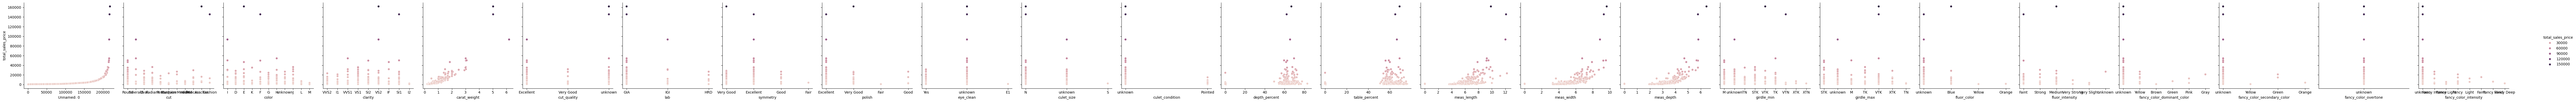

In [82]:
import seaborn as sns
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(diamond_df)), size=500, replace=False)

plt.figure(dpi=150)  
sns.pairplot(
    data=diamond_df.iloc[indices],
    y_vars='total_sales_price',
    x_vars=list(diamond_df.drop('total_sales_price', axis=1).columns),
    hue="total_sales_price",
    height=4
)

plt.show()

## Target Boxplot

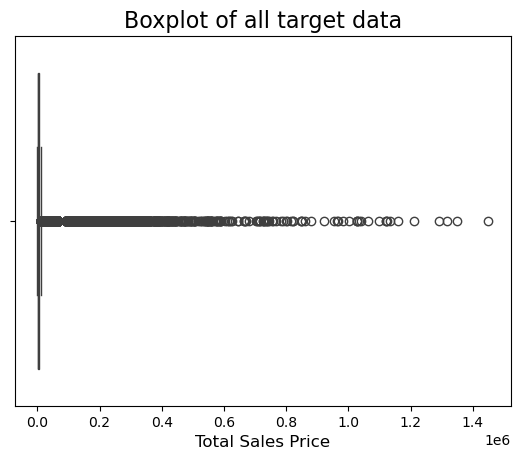

	Min:				 200
	Q1 (25th percentile):		 958.0
	Median (50th percentile):	 1970.0
	Q3 (75th percentile):		 5207.0
	Max:				 1449881
	Upper bound for outliers:	 11580.5
	Num of Outliers:		 27330


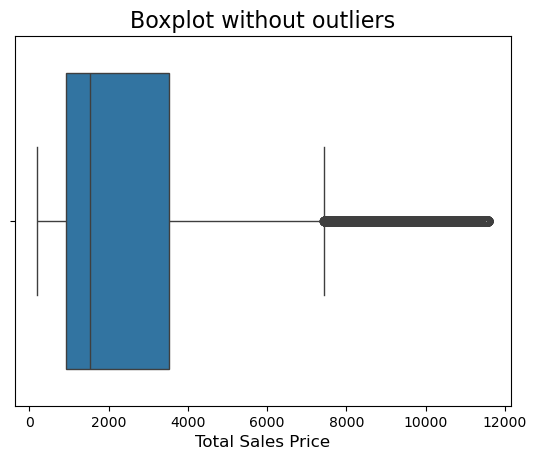

	Q1 (25th percentile):		 918.0
	Median (50th percentile):	 1516.0
	Q3 (75th percentile):		 3528.0


In [83]:
### All data

sns.boxplot(data=diamond_df, x='total_sales_price')

plt.title("Boxplot of all target data", fontsize=16)
plt.xlabel("Total Sales Price", fontsize=12)
plt.show()

q1 = diamond_df['total_sales_price'].quantile(0.25)
q3 = diamond_df['total_sales_price'].quantile(0.75)
iqr = q3 - q1 

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# five number summary 
print("\tMin:\t\t\t\t", min(diamond_df['total_sales_price']))
print("\tQ1 (25th percentile):\t\t", q1)
print("\tMedian (50th percentile):\t", diamond_df['total_sales_price'].median())
print("\tQ3 (75th percentile):\t\t", q3)
print("\tMax:\t\t\t\t", max(diamond_df['total_sales_price']))
print("\tUpper bound for outliers:\t", upper_bound)
outliers = diamond_df[diamond_df['total_sales_price'] > upper_bound]
print("\tNum of Outliers:\t\t", outliers.shape[0]) 

### No outliers
capped_df = diamond_df[diamond_df['total_sales_price'] <= upper_bound]

sns.boxplot(data=capped_df, x='total_sales_price')
plt.title("Boxplot without outliers", fontsize=16)
plt.xlabel("Total Sales Price", fontsize=12)
plt.show()

q1 = capped_df['total_sales_price'].quantile(0.25)
q3 = capped_df['total_sales_price'].quantile(0.75)
iqr = q3 - q1 

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("\tQ1 (25th percentile):\t\t", q1)
print("\tMedian (50th percentile):\t", capped_df['total_sales_price'].median())
print("\tQ3 (75th percentile):\t\t", q3)

## Target Scatter plot 

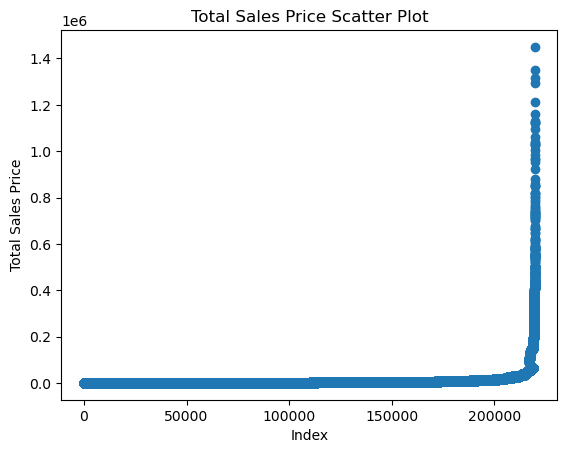

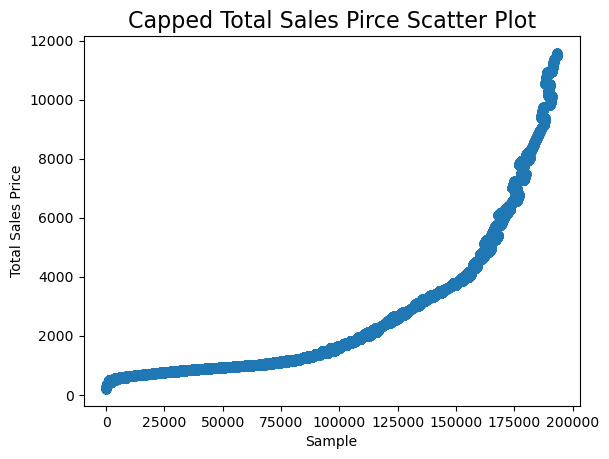

In [84]:
plt.scatter(diamond_df.iloc[:, 0], diamond_df['total_sales_price'])
plt.xlabel('Index')
plt.ylabel('Total Sales Price')
plt.title('Total Sales Price Scatter Plot')
plt.show()

plt.scatter(capped_df.iloc[:, 0], capped_df['total_sales_price'], alpha=0.7)
plt.xlabel('Sample')
plt.ylabel('Total Sales Price')
plt.title('Capped Total Sales Pirce Scatter Plot', fontsize=16)
plt.show()

## Target Histogram

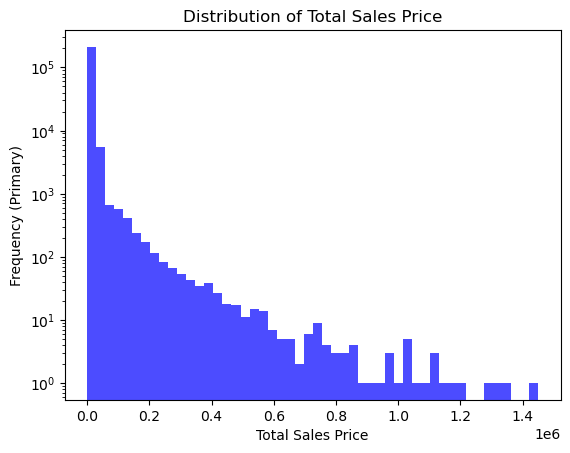

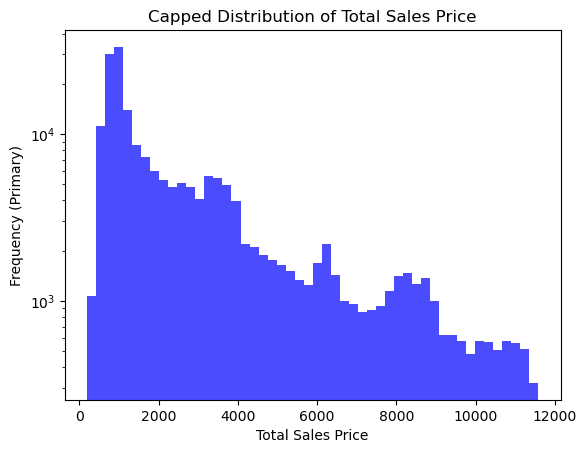

In [85]:
diamond_df['total_sales_price'].plot(kind='hist', bins=50, alpha=0.7, color='blue')
plt.yscale('log')
plt.title('Distribution of Total Sales Price')
plt.xlabel('Total Sales Price')
plt.ylabel('Frequency (Primary)')
plt.show()

capped_df['total_sales_price'].plot(kind='hist', bins=50, alpha=0.7, color='blue')
plt.yscale('log')
plt.title('Capped Distribution of Total Sales Price')
plt.xlabel('Total Sales Price')
plt.ylabel('Frequency (Primary)')
plt.show()

# Analysis 

From the visualizations it is clear that the data is concentrated around lower values but steadily builds to extreme values. The average of the dataset is somewhere around 6200 but their are about 1000 samples prices at over a hundred thousand dollars and 17 values over one million. 

I am concerned by the amount of unknown values in the non-numerical data. I think it best to seperate out the non-numerical data and then consider one-hot encoding only the ones with lower unknown counts. 

# Preprocessing 


In [86]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [87]:
from sklearn.preprocessing import OneHotEncoder
def get_preprocessed_data(percent, removeOutliers) -> Tuple[np.ndarray, ...]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = processor(percent, removeOutliers)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn) 
    X_vld = scaler.transform(X_vld)    
    X_tst = scaler.transform(X_tst)     
    
    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

In [88]:
def processor(percent, removeOutliers):
    
    #handle outliers
    df = diamond_df
    if removeOutliers:
        df = diamond_df[diamond_df['total_sales_price'] < 11000]
    processing_df = df.sample(frac=percent, random_state=42).reset_index(drop=True)

    y = processing_df.iloc[:, -1].values
    
    #get numeric and non-numeric columns
    numeric_cols = processing_df.select_dtypes(include=['number']).copy()
    non_numeric_cols = processing_df.select_dtypes(exclude=['number']).copy()
    
    #remove enumerating feature
    numeric_cols = numeric_cols.drop(columns=processing_df.columns[-1])
    numeric_cols = numeric_cols.drop(columns=processing_df.columns[0])

    #filter by unknowns
    usable_cols = []
    for column in non_numeric_cols.columns:
        unknown_count = (non_numeric_cols[column] == "unknown").sum()
        if (unknown_count / len(non_numeric_cols[column])) <= 0.20:
            # print(column + ",")
            usable_cols.append(column)

    #encode usable columns
    if usable_cols:
        from sklearn.preprocessing import OneHotEncoder
        encoder = OneHotEncoder(sparse_output=False)
        encoded_array = encoder.fit_transform(non_numeric_cols[usable_cols])
        encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(usable_cols))
    else:
        encoded_df = pd.DataFrame()
    
    #get X
    final_df = pd.concat([numeric_cols, encoded_df], axis=1)
    X = final_df.values

    return get_train_valid_test_data(X, y)


## Neural Network

In [89]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse

In [90]:
class ReLU():
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        return np.maximum(0, z)
    
    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        return (z > 0).astype(z.dtype)

In [91]:
class Tanh():
    """ The tanh actionvation function """
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        """ Computes the output of the tanh activation function """
        # TODO 4.1
        return np.tanh(z)

    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        """ Computes the derivative of the tanh activation function """
        # TODO 4.2
        return 1 - np.tanh(z)**2

In [92]:
def init_weights(
    n_input_features: int, 
    hidden_neurons: int, 
    output_neurons: int, 
) -> Tuple[np.ndarray, ...]:
    """ Initilize the hidden and output layer parameters
        
        Args:
            n_input_features: The number of input features

            hidden_neurons: The number of hidden neurons or units to 
                use in the hidden layer.

            output_neurons: The number of output neurons to use in 
                the output layer.

        Returns:
            A tuple of NumPy arrays containing the weights and biases
            for the hidden and output layers.
    """
    # TODO 5
    W1, b1, W2, b2 = None, None, None, None
    W1 = np.random.uniform(-.5, .5, (n_input_features, hidden_neurons))
    b1 = np.ones((1, hidden_neurons))

    W2 = np.random.uniform(-.5, .5, (hidden_neurons, output_neurons))
    b2 = np.ones((1, output_neurons))
    
    return W1, b1, W2, b2

In [93]:
def forward(
    X: np.ndarray, 
    W1: np.ndarray, 
    b1: np.ndarray,
    W2: np.ndarray, 
    b2: np.ndarray, 
) -> Tuple[np.ndarray, ...]:
    """ Forward pass for 2 layer neural network
    
        Args:
            X: Input features
            
            W1: Hidden layer weights 
            
            b1: Hidden layer baises

            W2: Output layer weights 
            
            b2: Output layer baises

        Returns:
            A tuple of NumPy arrays containing the linear combination and 
            acitvation outputs for each layer. These are needed to compute 
            the backward pass.
    """
    Z1, A1, Z2, A2 = None, None, None, None
    # TODO 6
    
    Z1 = np.dot(X, W1) + b1
    A1 = Tanh.activation(Z1)  
    Z2 = np.dot(A1, W2) + b2
    A2 = ReLU.activation(Z2)
    
    return Z1, A1, Z2, A2

In [94]:
def output_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """ Compute gradients for the output layer parameters
        
        Note:
            You might not use all the passed arguments!
    
        Args:
            X: Input data given as a matrix
            
            y: Ground truth labels given as a column vector

            W1: Hidden layer weights
            
            Z1: Linear combination output for hidden layer

            A1: Activation output for hidden layer
            
            W2: Output layer weights

            Z2: Linear combination output for the output layer

            A2: Activation output or the output layer. Also 
                referred to as y_hat.
            
        Return:
            A tuple of NumPy arrays containing the average gradient 
            for the output layer weights and biases.
    """
    # TODO 7
    W2grad, b2grad = None, None
    
    W2grad = (1 / X.shape[0]) * np.dot(A1.T, A2 - y)  
    b2grad = (1 / X.shape[0]) * np.sum(A2 - y, axis = 0, keepdims = True) 
    
    return W2grad, b2grad

In [95]:
def hidden_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """ Compute gradients for the hidden layer parameters
        
        Note:
            You might not use all the passed arguments!
    
        Args:
            X: Input data given as a matrix
            
            y: Ground truth labels given as a column vector

            W1: Hidden layer weights
            
            Z1: Linear combination output for hidden layer

            A1: Activation output for hidden layer
            
            W2: Output layer weights

            Z2: Linear combination output for the output layer

            A2: Activation output or the output layer. Also 
                referred to as y_hat.
            
        Return:
            A tuple of NumPy arrays containing the average gradient 
            for the hidden layer weights and biases.
    """
    # TODO 8
    W1grad, b1grad = None, None

    d1 = (np.dot(A2 - y, W2.T)) * Tanh.derivative(Z1) 
    
    W1grad = (1/X.shape[0]) * np.dot(X.T, d1)  
    b1grad = (1/X.shape[0]) * np.sum(d1, axis=0, keepdims=True)  

    return W1grad, b1grad

In [96]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [97]:
class NeuralNetwork():
    def __init__(self,
                 hidden_neurons: int,
                 output_neurons: int,
                 alpha: float,
                 batch_size: int,
                 epochs: int = 1,
                 seed: int = 0
                 ):
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.batch_size = batch_size
        self.alpha = alpha
        self.epochs = epochs
        self.seed = seed

        
        # Initialize weights and biases
        self.W1, self.b1 = None, None
        self.W2, self.b2 = None, None
        self.trn_error = None
        self.vld_error = None

    def fit(self, X: np.ndarray, y: np.ndarray, X_vld: np.ndarray = None, y_vld: np.ndarray = None):
        """ Trains the neural network using SGD with a penalty for negative predictions
        
            Args:
                X: Training data given as a 2D matrix
                y: Training labels given as a 2D column vector
                X_vld: Validation data (optional)
                y_vld: Validation labels (optional)
                
            Returns:
                The class's own object reference.
        """
        np.random.seed(self.seed)
        self.trn_error = []
        self.vld_error = []
        
        self.W1, self.b1, self.W2, self.b2 = init_weights(
            X.shape[1], self.hidden_neurons, self.output_neurons
        )
        
        for epoch in range(self.epochs):
            batches = get_batches(X.shape[0], self.batch_size)
            for batch in batches:
                batchX, batchy = X[batch], y[batch]
                
                # forward pass
                Z1, A1, Z2, A2 = forward(batchX, self.W1, self.b1, self.W2, self.b2)
                
                # compute gradients
                W2grad, b2grad = output_layer_grads(batchX, batchy, self.W1, Z1, A1, self.W2, Z2, A2)
                W1grad, b1grad = hidden_layer_grads(batchX, batchy, self.W1, Z1, A1, self.W2, Z2, A2)
                
                # backpropagate and update weights and biases
                self.W1 -= self.alpha * W1grad
                self.b1 -= self.alpha * b1grad
                self.W2 -= self.alpha * W2grad  
                self.b2 -= self.alpha * b2grad
            
            # calculate RMSE for training
            trn_rmse = np.sqrt(mse(y, self.predict(X)))
            self.trn_error.append(trn_rmse)
            
            if X_vld is not None and y_vld is not None:
                # calculate RMSE for validation
                vld_rmse = np.sqrt(mse(y_vld, self.predict(X_vld)))
                self.vld_error.append(vld_rmse)

        return self

    def predict(self, X: np.ndarray):
        """ Make predictions using forward pass.
        
            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        _, _, _, predictions = forward(X, self.W1, self.b1, self.W2, self.b2)
        predictions = np.maximum(predictions, 0)
        return predictions

## Training and Performance Analysis (RMSE)

For the sake of my CPU I will not be using the entirety of the diamonds dataset. Instead I will be using 5% of it which comes out to about 11000 entries. 


	Normalized Test RMSE: 	  0.0166

	Train time: 		  83.9306 seconds
	Test RMSE: 		$ 24020.89
	y_tst range: 		  1449677 [204, 1449881]


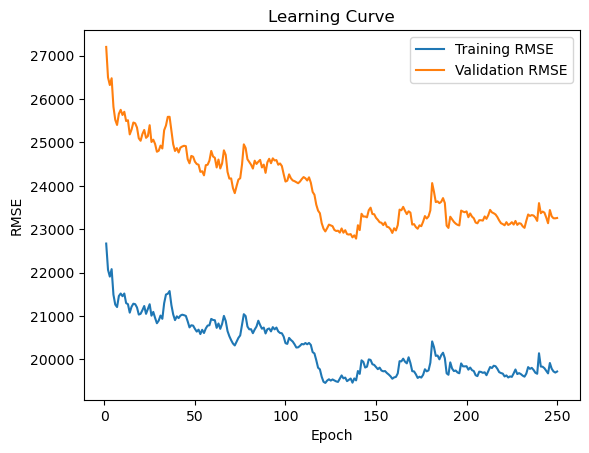

In [101]:
# TODO 10
import time

nn = None
nn = NeuralNetwork(
    hidden_neurons=100,      
    output_neurons=1,       
    alpha=0.0001,             
    batch_size=32,          
    epochs=250,             
    seed=42
)

# process a random 5% of the dataset. 
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data(.5, removeOutliers=False)

#training and predication 
start_time = time.time()
nn.fit(X_trn, y_trn, X_vld, y_vld)
y_pred = nn.predict(X_tst)
end_time = time.time()

########################### Test RMSE data ###########################
test_rmse = np.sqrt(mse(y_tst, y_pred))
tst_range = y_tst.max()-y_tst.min()
print(f"\n\tNormalized Test RMSE: \t  {(test_rmse/tst_range):.4f}\n")
print(f"\tTrain time: \t\t  {(end_time-start_time):.4f} seconds")
print(f"\tTest RMSE: \t\t$ {test_rmse:.2f}")
print(f"\ty_tst range: \t\t  {tst_range} [{y_tst.min()}, {y_tst.max()}]")

# plot rmse over epochs
plt.plot(range(1, nn.epochs+ 1), nn.trn_error, label='Training RMSE')
plt.plot(range(1, nn.epochs+ 1), nn.vld_error, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()

plt.show()


	Normalized Test RMSE: 	  0.0622

	Train time: 		  4.8157 seconds
	Test RMSE: 		$ 668.7963
	y_tst range: 		  10758 [212, 10970]


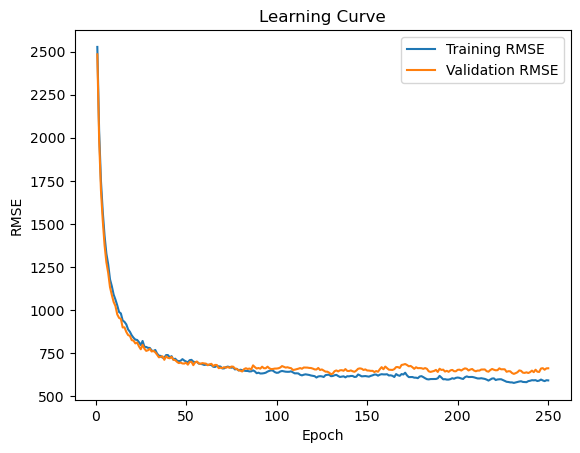

In [99]:
# TODO 10
import time

nn = None
nn = NeuralNetwork(
    hidden_neurons=50,      
    output_neurons=1,       
    alpha=0.0001,             
    batch_size=32,          
    epochs=250,             
    seed=42
)

# process a random 5% of the dataset. 
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data(.05, removeOutliers=True)

# training and predication 
start_time = time.time()
nn.fit(X_trn, y_trn, X_vld, y_vld)
y_pred = nn.predict(X_tst)
end_time = time.time()

########################### Test RMSE data ###########################
test_rmse = np.sqrt(mse(y_tst, y_pred))
tst_range = y_tst.max()-y_tst.min()
print(f"\n\tNormalized Test RMSE: \t  {(test_rmse/tst_range):.4f}\n")
print(f"\tTrain time: \t\t  {(end_time-start_time):.4f} seconds")
print(f"\tTest RMSE: \t\t$ {test_rmse:.4f}")
print(f"\ty_tst range: \t\t  {tst_range} [{y_tst.min()}, {y_tst.max()}]")

# plot rmse over epochs
plt.plot(range(1, nn.epochs+ 1), nn.trn_error, label='Training RMSE')
plt.plot(range(1, nn.epochs+ 1), nn.vld_error, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()

plt.show()